# Operational Software Technologies

Dr Moody Alam

## Topics

>[0 Element-wise Array Operations](#scrollTo=RuZItvbXiuSt)

>[1 Broadcasting](#scrollTo=kK4zEtmHBisz)

>[1.1 Broadcasting Rules](#scrollTo=LCeLH_ETOTMB)

>[2 Simple Indexing](#scrollTo=uLGXiDuQiuS2)

>[3 Advanced Indexing](#scrollTo=45X9cSMtiuS3)

>[4 Copying vs. Views](#scrollTo=tz81ZQdtiuS6)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# @title ### 0 Customised Matrix Print Function.     This function prints out matrices for easier visualisation in the lectures. Feel free to skip over it as it doesn't relate to your learning.
import inspect
from collections.abc import Iterable

def _rows_from_any(x):
    if np.isscalar(x) or not isinstance(x, Iterable) or isinstance(x, (str, bytes)):
        rows = [[x]]
    else:
        arr = np.array(x, dtype=object)
        if arr.ndim == 0:
            rows = [[arr.item()]]
        elif arr.ndim == 1:  # 1D array
            rows = [list(arr)]  # row vector
        elif arr.ndim == 2:
            rows = [list(r) for r in arr]  # 2D: matrix or column vector
        else:
            # For higher dims: flatten each row
            rows = [list(r.ravel()) for r in arr]
    maxc = max(len(r) for r in rows) if rows else 1
    rows = [list(r) + [""] * (maxc - len(r)) for r in rows]
    return rows

def _infer_titles_from_vars(seq, caller_locals):
    id2name = {id(v): k for k, v in caller_locals.items()}
    items = []
    for obj in seq:
        title = id2name.get(id(obj), "Array")
        items.append((title, obj))
    return items

def print_matrices(data):
    """
    Pretty-print arrays with labels, handling row vs column vectors properly.
    - shape (n,)   -> row vector 1×n
    - shape (n,1)  -> column vector n×1
    - shape (1,n)  -> row vector 1×n
    - shape (m,n)  -> matrix
    """
    if isinstance(data, dict):
        items = list(data.items())
    elif isinstance(data, (np.ndarray, list, tuple)) and not isinstance(data, (str, bytes)):
        if not isinstance(data, (list, tuple)) or (len(data) > 0 and not isinstance(data[0], (np.ndarray, list, tuple))):
            frame = inspect.currentframe().f_back
            title = {id(v): k for k, v in frame.f_locals.items()}.get(id(data), "Array")
            items = [(title, data)]
        else:
            frame = inspect.currentframe().f_back
            items = _infer_titles_from_vars(data, frame.f_locals)
    else:
        frame = inspect.currentframe().f_back
        title = {id(v): k for k, v in frame.f_locals.items()}.get(id(data), "Value")
        items = [(title, data)]

    n = len(items)
    fig, axes = plt.subplots(1, n, figsize=(5*n, 1.8))
    if n == 1:
        axes = [axes]

    for ax, (title, obj) in zip(axes, items):
        arr = np.array(obj, dtype=object)

        # Handle shapes explicitly
        if arr.ndim == 1:
            rows = [list(arr)]  # row vector
        elif arr.ndim == 2:
            if arr.shape[1] == 1:   # column vector
                rows = [[val[0]] for val in arr.tolist()]
            else:                   # matrix
                rows = arr.tolist()
        else:
            rows = _rows_from_any(arr)

        ax.axis("off")
        ax.text(0.5, 1.0, f"{title}", fontsize=11, ha="center", va="bottom", transform=ax.transAxes)
        table = ax.table(cellText=rows, loc="center", cellLoc="center")
        table.auto_set_font_size(False)
        table.set_fontsize(10)

    plt.subplots_adjust(wspace=0.4, top=0.95, bottom=0.05)
    plt.tight_layout(pad=0.01)
    plt.show()
    plt.close(fig)


### 0. Element-wise Array Operations

We've already seen that we can use operators to perform element by element operations on arrays.

In [3]:
# Example arrays
a = np.array([1, 2, 3, 4])
b = np.array([10, 20, 30, 40])

# Elementwise operations
add_result = a + b
sub_result = a - b
mul_result = a * b
div_result = a / b

# Show results
print("a =", a)
print("b =", b)
print("a + b =", add_result)
print("a - b =", sub_result)
print("a * b =", mul_result)
print("a / b =", div_result)


a = [1 2 3 4]
b = [10 20 30 40]
a + b = [11 22 33 44]
a - b = [ -9 -18 -27 -36]
a * b = [ 10  40  90 160]
a / b = [0.1 0.1 0.1 0.1]


## 1. Broadcasting

Let's start with a simple addition of vectors to explore broadcasting.


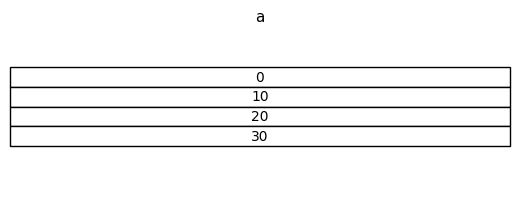

(4, 1)


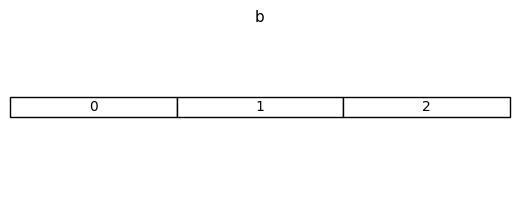

(3,)


In [4]:
#Let's creat a four element vector
a = np.arange(0, 40, 10)
#Turn it into a column vector
a = a[:,None]
print_matrices(a)
print(a.shape)

#Let's creat another four element vector
b = np.array([0, 1, 2])
print_matrices(b)
print(b.shape)



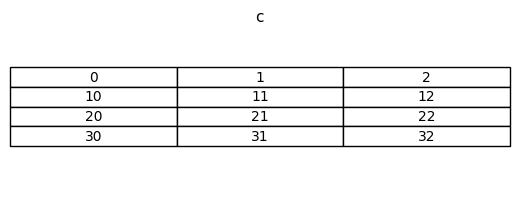

(4, 3)


In [5]:
#Let's add the vectors
c = a+b
print_matrices(c)
print(c.shape)

How? `a` is a column vector and `b` is a row vector. The `a+b` is a matrix!

To provide sufficient elements when the arrays are not the same size, numpy hallucinates the missing data. This is called broadcasting, as in one to many as it repeats the data to fill the space.

Now let's look at an example of the dot product. (Tip: Check out the dot product page on wikipedia. https://en.wikipedia.org/wiki/Dot_product)

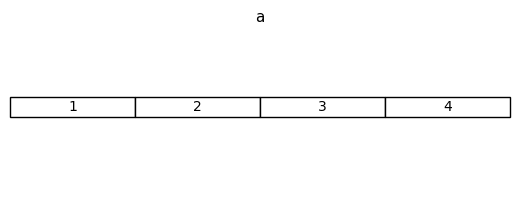

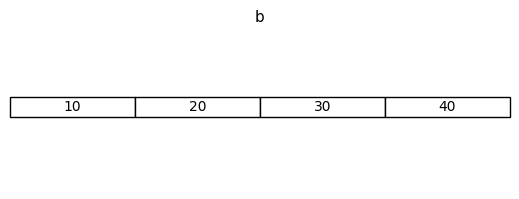

In [6]:
# Let's create a couple of four element vectors.
a = np.array([1, 2, 3, 4])     # (n,)
b = np.array([10, 20, 30, 40]) # (n,)

print_matrices(a)
print_matrices(b)


In [7]:
# Three equivalent ways to compute the dot product
print('np.dot(a, b) =', np.dot(a, b))       # as a function
print('a.dot(b) =', a.dot(b))           # as a method
print('(a * b).sum() =', (a * b).sum())      # elementwise product + sum

np.dot(a, b) = 300
a.dot(b) = 300
(a * b).sum() = 300


How about with a 3x3 matrix?

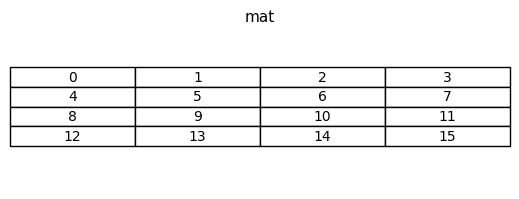

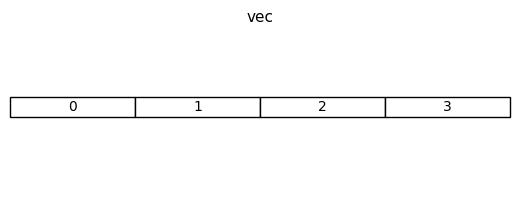

In [8]:

# create the matrix by reshaping a vector
mat = np.arange(16).reshape((4,4))
# and create a vector as well
vec = np.arange(4)

print_matrices(mat)
print_matrices(vec)

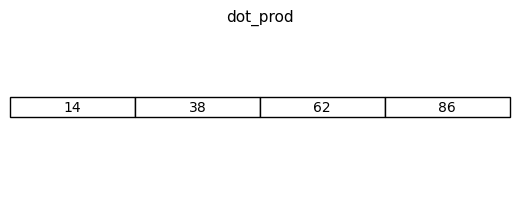

In [11]:
# using the dot() method
dot_prod = mat.dot(vec)
print_matrices(dot_prod)

How? The matrices aren't the same size. One is a vector!

In [9]:
print(mat.shape)
print(vec.shape)

(4, 4)
(4,)


numpy pretended the vector was [1,4] and broadcasted (repeated it) as if it was a matrix (of the same rows).

Let's look another example with illustration to drive the point home on broadcasting

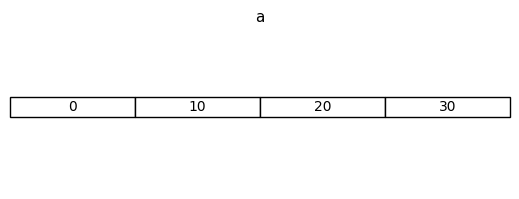

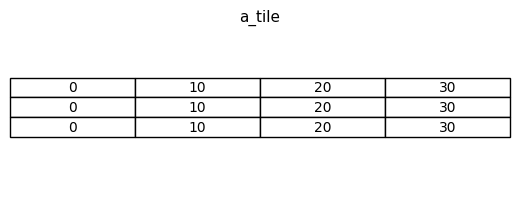

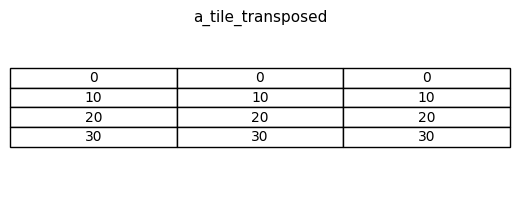

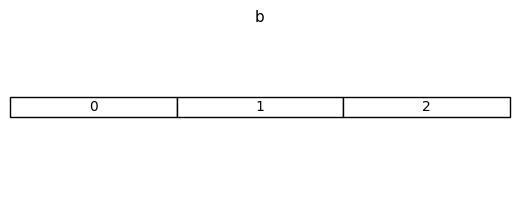

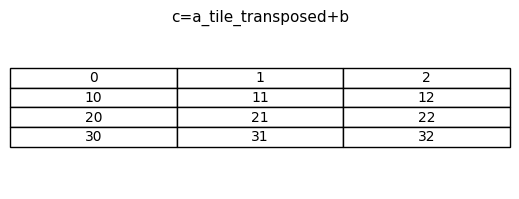

In [10]:
#Create a four element row vector
a = np.arange(0, 40, 10)
#turn it into a 3x1 matrix by repeating the row vector
a_tile = np.tile(a, (3, 1))
#transpose the matrix
a_tile_transposed = a_tile.T

#Let's create another row vector
b = np.array([0, 1, 2])

#Let's add the matrix and vector - note that the dimensions of the matrix and vector differ.
c = a_tile_transposed+b



print_matrices(a)
print_matrices(a_tile)
print_matrices(a_tile_transposed)
print_matrices(b)
print_matrices({"c=a_tile_transposed+b":c})



The following figure illustrate the braodcasting.

(Credit: https://lectures.scientific-python.org/_downloads/ScientificPythonLectures-simple.pdf, page 81)

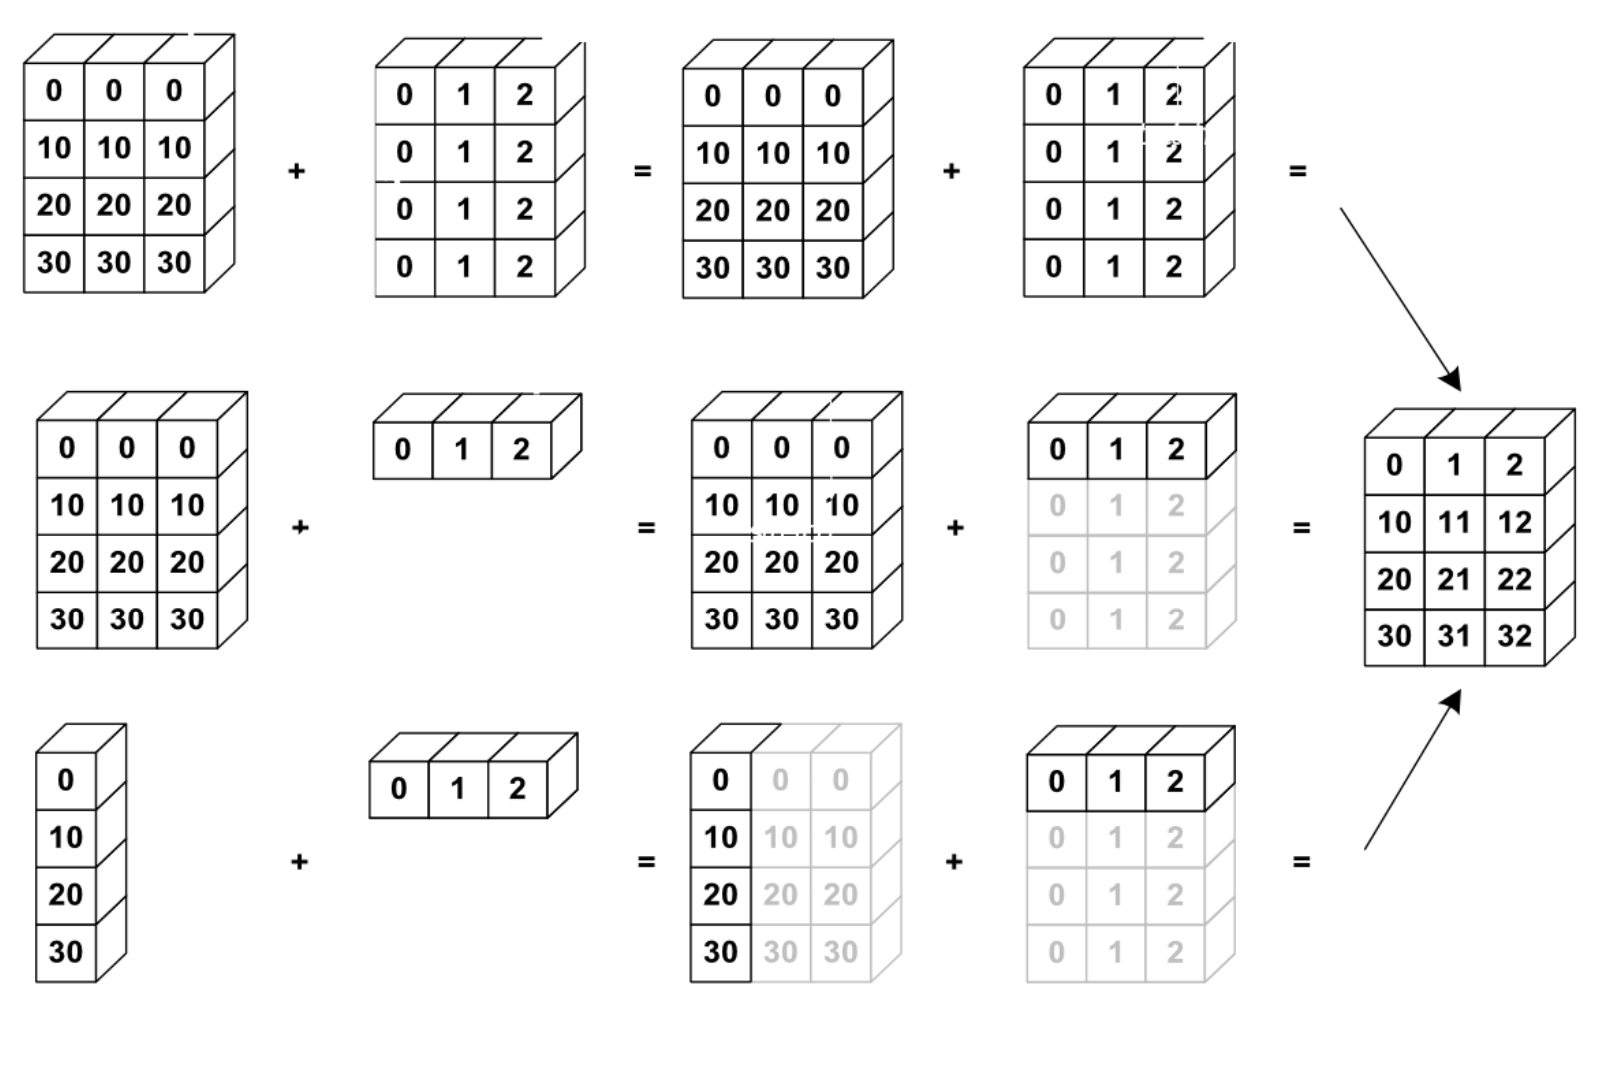

### Broadcasting Rules
There are some rules:

* If the two arrays have different dimension counts, sufficient additional dimensions of length one are added to the left of the smaller of the two to make them the same. (Tip: Check out the official Numpy documentation on those rules - https://numpy.org/doc/stable/user/basics.broadcasting.html)

* If a length one matches a length _n_, the data is repeated _n_ times to make them the same length.

Dimensions that have different lengths, but neither is 1 cannot be matched.

We can control where the extra length one dimensions are added.


Now let's explore the the use of `None` keyword to specify a dimension

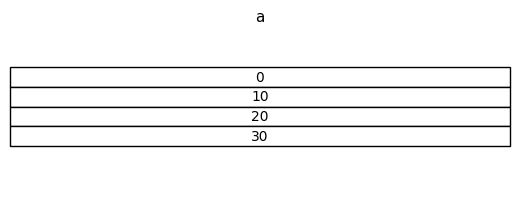

(4, 1)


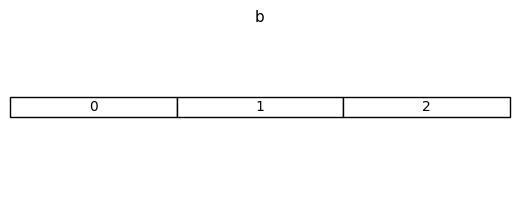

(3,)


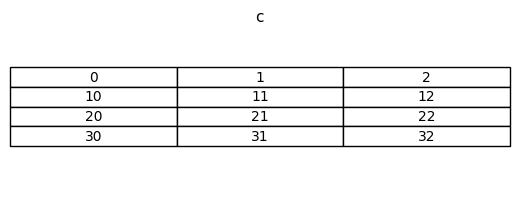

(4, 3)


In [13]:
#Let's creat a four element vector
a = np.arange(0, 40, 10)

#THIS WILL NOT WORK - COMMENT IT OUT
#Turn it into a column vector
#a = a.T

#UNCOMMENT THIS
a = a[:,None]

print_matrices(a)
print(a.shape)

#Let's creat another four element vector
b = np.array([0, 1, 2])
#b = b[None,:]
print_matrices(b)
print(b.shape)

c = a+b
print_matrices(c)
print(c.shape)

### 2. Simple Indexing

The use of `:` indicates a slice, the same way it does in Python lists.

And all the usual stuff works. If you miss out a dimension, it's assumed to be :

In [14]:
a = np.arange(8)

print(a)
print(a[4])
print(a[-2])
print()

print(a[3:6])

[0 1 2 3 4 5 6 7]
4
6

[3 4 5]


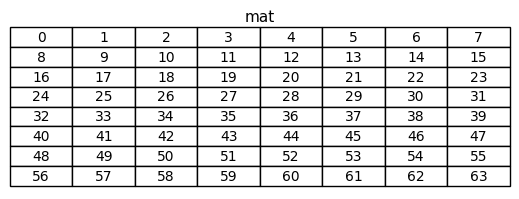

In [15]:
mat = np.arange(8*8).reshape((8,8))
print_matrices(mat)

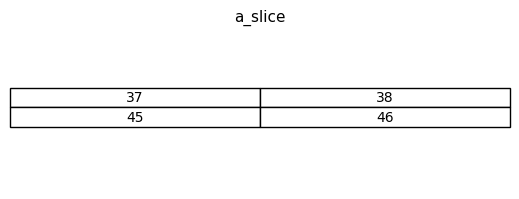

In [16]:
a_slice = mat[4:6,5:7]
print_matrices(a_slice)

In [17]:
print(mat[4:6,:])
print()
print(mat[4:6])
print()
print(mat[:,4:6])

[[32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47]]

[[32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47]]

[[ 4  5]
 [12 13]
 [20 21]
 [28 29]
 [36 37]
 [44 45]
 [52 53]
 [60 61]]


In [18]:
print(mat[1])

[ 8  9 10 11 12 13 14 15]


Tuples can be used in place of individual values and will be broken in to their component parts. The two lines below mean the same thing.

A useful way to absract way from the number of dimensions.

In [19]:
print(mat[3,2])
print(mat[(3,2)])

t = (3,2)
print(mat[t])

26
26
26


We can also use slice() to build an object we can then apply. Helpful if we perform the same slicing repeatedly.

In [20]:
print(mat[4:6,:])

print()

l = slice(4,6)
m = slice(None)

print(mat[l,m])

[[32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47]]

[[32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47]]


In [21]:
# We are not allowed to write : in the tuple

t = (4:6,:)

print(mat[t])

SyntaxError: invalid syntax (1171309471.py, line 3)

In [22]:
# So we use slice() instead

t = slice(3,5), slice(5, None) # create the slice object
print(t)
mat[t] # apply the slice object

(slice(3, 5, None), slice(5, None, None))


array([[29, 30, 31],
       [37, 38, 39]])

### 3. Advanced Indexing

We can index with a boolean array. This is a selection operation and allows us to select entries based on a condition.

In [23]:
a = np.random.rand(10)
print(a)

[0.22291486 0.69837136 0.23370906 0.20319229 0.17232512 0.61151745
 0.4568672  0.45081504 0.41062596 0.23827239]


In [24]:
print(a > 0.5)

[False  True False False False  True False False False False]


In [25]:
print(a[1:2])
print(a[a > 0.5])

[0.69837136]
[0.69837136 0.61151745]


The arrays shapes **must** match, it does not broadcast.

In [26]:
b = np.random.rand(6)
print(b)
b[b>0.5] = 1.0
print(b)

[0.55780182 0.97929379 0.21004773 0.85599089 0.740997   0.61222944]
[1.         1.         0.21004773 1.         1.         1.        ]


But it will support only indexing a subset of dimensions. (Think of the remainder as a single object.)

In [27]:
a = np.random.rand(6,3)
print(a)
print()
print(a.sum(axis=1))
print()
index = a.sum(axis=1) > 1.5
print(index)
print(a[index]) # only shows the rows that sum above 1.5

[[0.7360974  0.26446345 0.28618435]
 [0.20323042 0.37848852 0.61628828]
 [0.76199988 0.38203585 0.3236503 ]
 [0.18060247 0.73854834 0.31929017]
 [0.19637425 0.40131063 0.44148864]
 [0.15638415 0.49993803 0.79959785]]

[1.28674521 1.19800723 1.46768603 1.23844098 1.03917352 1.45592004]

[False False False False False False]
[]


We can also use integers.

In [28]:
a = np.arange(32) * 2
print(a)

index = np.arange(6,12)

print(index)

print(a[index])

[ 0  2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 44 46
 48 50 52 54 56 58 60 62]
[ 6  7  8  9 10 11]
[12 14 16 18 20 22]


In [29]:
a = np.random.rand(18)
index = np.nonzero(a>0.5) # nonzero converts a boolean index into an integer one.
print(index)
print()

print(a)
print()
print(a[a>0.5])
print()
print(a[index])

(array([ 0,  4, 10, 12, 14, 15, 16]),)

[0.97105216 0.45187988 0.05404331 0.48670969 0.93115709 0.17477896
 0.07640791 0.36866977 0.41424981 0.40393896 0.67609527 0.00241215
 0.82847388 0.38945671 0.69364915 0.61744001 0.54066765 0.02310874]

[0.97105216 0.93115709 0.67609527 0.82847388 0.69364915 0.61744001
 0.54066765]

[0.97105216 0.93115709 0.67609527 0.82847388 0.69364915 0.61744001
 0.54066765]


Boolean used multiple dimensions to deal with multiple dimensions. Integer can only do one at a time. Be careful, it can get messy when you start combining with the other indexing methods.

In [30]:
# extract the diagonal from an array.

a = np.arange(16).reshape((4,4))
print(a)

index = np.arange(4)

print(a[index,index])


[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
[ 0  5 10 15]


In [32]:
# easier to do this...

np.diag(a)

#the moral of the story, check if the functionality you need is already in the library. For many cases it is.

# numpy.org for documentation.

array([ 0,  5, 10, 15])

### 4. Copying vs. Views

In normal Python, indexing is a copy, but you can assign through it.

In numpy,

* Indexing with only single integers and slices is simple.

* Indexing with an array is advanced.

Simple indexing gets a view - if you change it, you change the original.

Advanced gets a copy. Changes will not affect the original.

In [33]:
a = np.array([7%(1+i) for i in range(8)])
print(a)

b = a[:]
b[5] = 12


print(a)
print(b)

[0 1 1 3 2 1 0 7]
[ 0  1  1  3  2 12  0  7]
[ 0  1  1  3  2 12  0  7]


In [34]:
a = np.random.rand(12)
print(a)
print()
index = np.arange(3,7)
b = a[index]

print(b)
print()
b[:] = 3

print(b)
print()
print(a)

[0.46587711 0.84771543 0.0554853  0.83256981 0.19339947 0.95140379
 0.91579366 0.16335053 0.69164311 0.4122167  0.57566229 0.21914508]

[0.83256981 0.19339947 0.95140379 0.91579366]

[3. 3. 3. 3.]

[0.46587711 0.84771543 0.0554853  0.83256981 0.19339947 0.95140379
 0.91579366 0.16335053 0.69164311 0.4122167  0.57566229 0.21914508]


But, you can still assign through the advanced vector.

In [35]:
a[index] = b
print(a)

[0.46587711 0.84771543 0.0554853  3.         3.         3.
 3.         0.16335053 0.69164311 0.4122167  0.57566229 0.21914508]


Final bit of indexing.

Double indexing does n't work (because of the copying.)

The fix shown here is only applying one index array.

In [36]:
a = np.random.rand(12)

index = np.arange(3,7)
a[index][2] = 5 # Double indexing - does not work
print(a)

print()

a[index[2]] = 5 # Fix - does work
print(a)

[0.66746386 0.14883629 0.43696099 0.30546924 0.45726291 0.30850989
 0.09140462 0.63757301 0.18168187 0.19392344 0.63094464 0.43006083]

[0.66746386 0.14883629 0.43696099 0.30546924 0.45726291 5.
 0.09140462 0.63757301 0.18168187 0.19392344 0.63094464 0.43006083]
